In [ ]:
from IPython.core.display import display,HTML

HTML('''<script>
    hideInput = () => $('div.input').hide();
</script>
<body onload="javascript:hideInput()"></body>''')

display(HTML('<style>.prompt{width: 0px; min-width: 0px; visibility: collapse}</style>'))

# Assignment 1 - Regression

***Student Details:***

- Name : Anjishnu Mukherjee
- Registration Number : B05-511017020
- Class Roll Number : CS Gy-70
- Exam Roll Number : 510517086
- Email : 511017020.anjishnu@students.iiests.ac.in

## Project Setup

### Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


### Load files and libraries, set seed

Source of Data : [Kaggle House Prices Dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/)

In [ ]:
%%capture
file_path = '/content/drive/My Drive/ML_LAB/Assign_1/house-prices-data/' 
data_path = file_path + 'train.csv'

import platform
import random
import os
import sys
from collections import OrderedDict  
import numpy as np 
import pandas as pd 
import seaborn as sns  
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

def get_lib_versions():
  print("------------------------------------")
  output = OrderedDict()
  output["OS"] = platform.platform()
  output["Python version"] = sys.version.replace("\n", " ")
  output["Numpy version"] = np.version.full_version
  output["Pandas version"] = pd.__version__
  output["Matplotlib version"] = matplotlib.__version__
  output["Seaborn version"] = sns.__version__
  output["Scikitlearn version"] = sklearn.__version__
  for kv in output.items():
    print("%s: %s" % kv)
  print("------------------------------------")

def fix_seeds(seed=1337):
  SEED = seed
  random.seed(seed)
  os.environ['PYTHONHASHSEED'] = str(SEED)
  np.random.seed(SEED)
  sns.set_style("dark")
  sns.set_context("paper")
  sns.set_palette("colorblind")

In [ ]:
print("Environment Information : ")
get_lib_versions()
fix_seeds()

Environment Information : 
------------------------------------
OS: Linux-4.19.112+-x86_64-with-Ubuntu-18.04-bionic
Python version: 3.6.9 (default, Jul 17 2020, 12:50:27)  [GCC 8.4.0]
Numpy version: 1.18.5
Pandas version: 1.0.5
Matplotlib version: 3.2.2
Seaborn version: 0.10.1
Scikitlearn version: 0.22.2.post1
------------------------------------


## Read dataset into Pandas dataframe

In [ ]:
df_train = pd.read_csv(data_path)
df_train.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Analyze the columns of the dataset. 


### SalePrice distribution isn't a perfect Gaussian curve.

In [ ]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The mean SalePrice is nearly 181,000 units which seems to be a reasonable number given the context of this dataset.

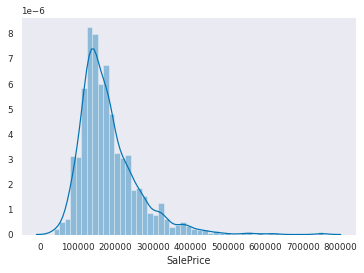

In [ ]:
sns.distplot(df_train['SalePrice']);

Clearly SalePrice follows a slightly shifted normal distribution.

Let's now compare the pairwise distributions of all the relevant features of analysis.

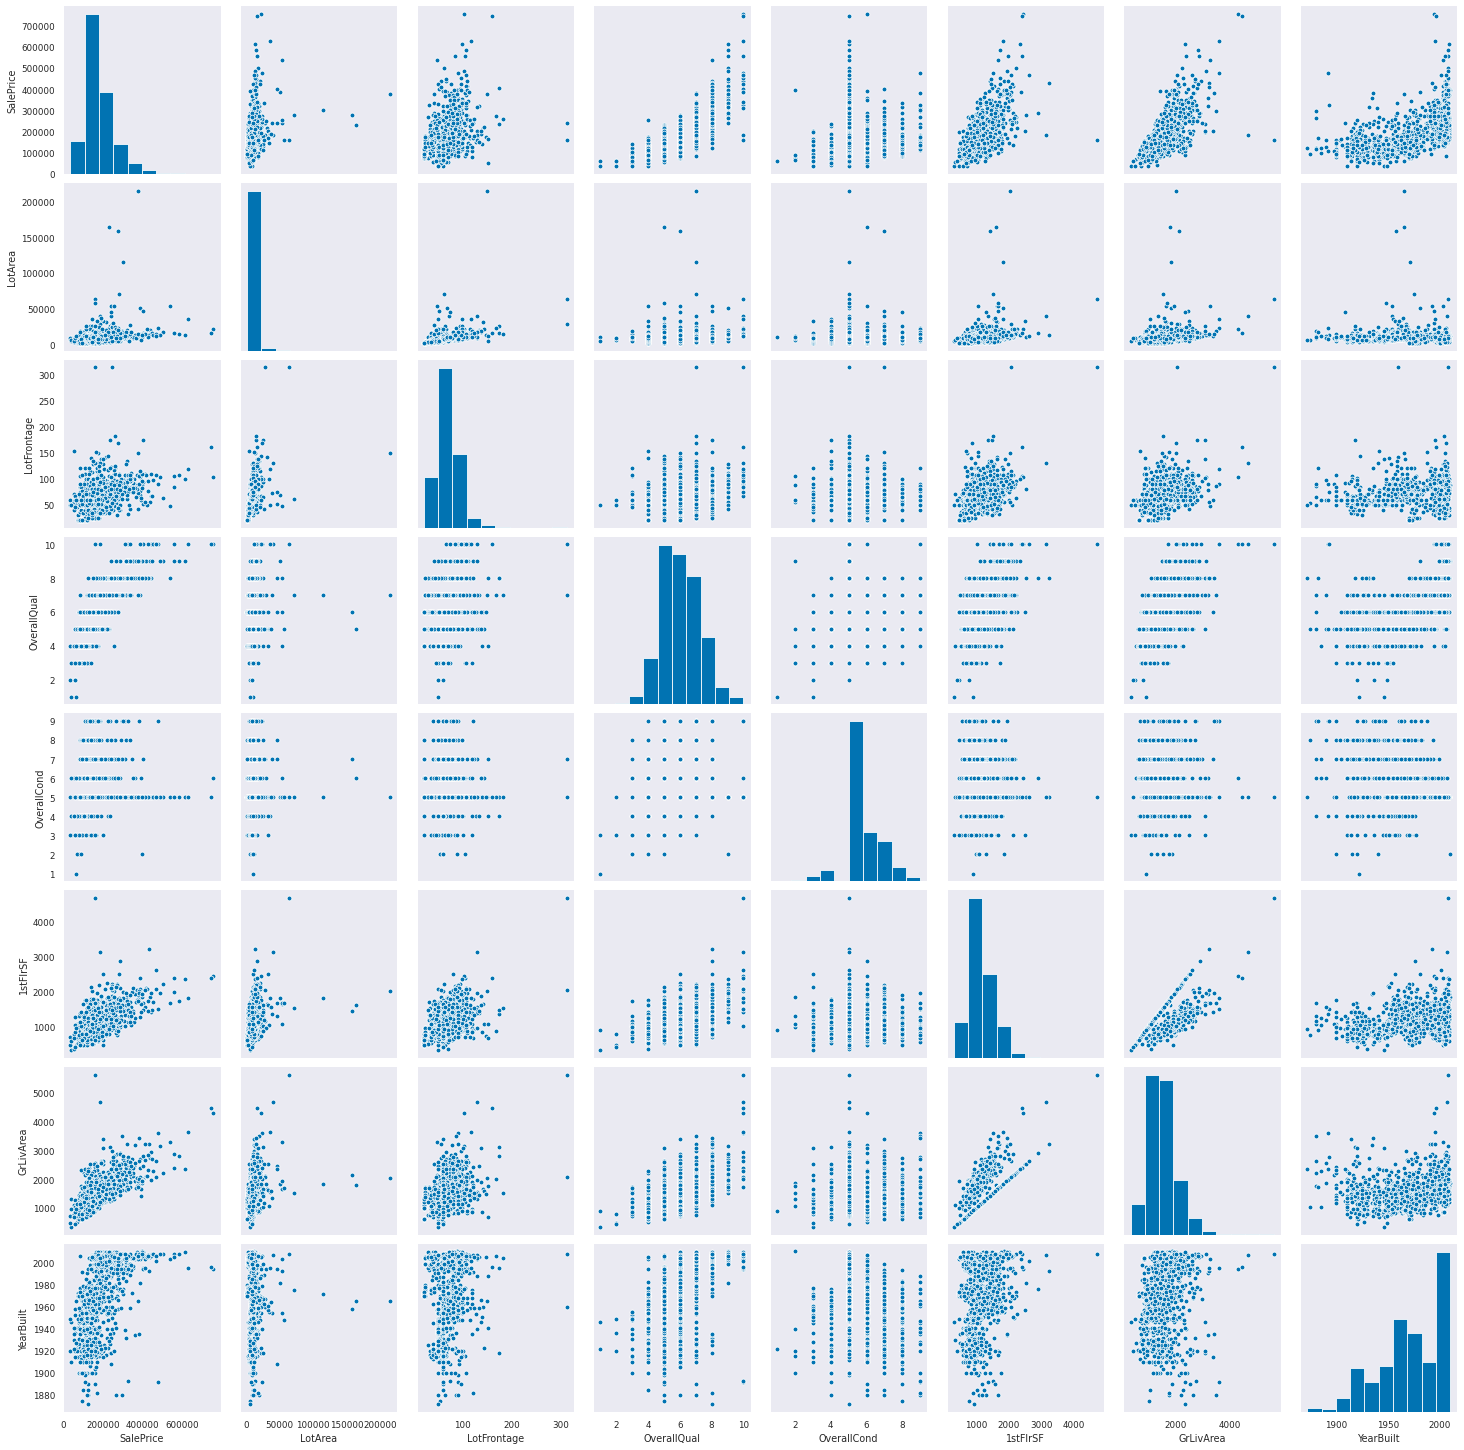

In [ ]:
cols = ['SalePrice', 'LotArea', 'LotFrontage', 'OverallQual', 'OverallCond', '1stFlrSF', 'GrLivArea', 'Street', 'Neighborhood', 'YearBuilt']
sns.pairplot(df_train[cols], height=2.5)
plt.show();

## Remove the rows with a missing value.

Additionally I retain only those columns which will be used for this analysis and drop all rows which have missing values in those columns.

In [ ]:
print("Data shape : ")
df_train.shape

Data shape : 


(1460, 81)

In [ ]:
print("Data with only required columns : ")
df_train = df_train[cols] 
df_train.shape

Data with only required columns : 


(1460, 10)

In [ ]:
print("Data after dropping all rows with missing values : ")
df_train = df_train.dropna()
df_train.shape

Data after dropping all rows with missing values : 


(1201, 10)

In [ ]:
print("Number of missing values in data : ")
df_train.isnull().sum().sum()

Number of missing values in data : 


0

For all the cells in the final dataframe, there are no missing values.

## Divide the training.csv into two sets of ratio 80:20 entitled to train and test set respectively.


In [ ]:
train, test = train_test_split(df_train, test_size=0.2)

In [ ]:
print("Training set shape: ")
train.shape

Training set shape: 


(960, 10)

In [ ]:
print("Testing set shape: ")
test.shape

Testing set shape: 


(241, 10)

## Use the linear regression method to estimate the slope and intercept for predicting 'SalePrice' based on 'LotArea'

-  Model 0 : LotArea

In [ ]:
y_train = train["SalePrice"].values
y_test = test["SalePrice"].values
weights_of_LotArea = {}

In [ ]:
model_0 = LinearRegression(normalize=True)



X_train = train["LotArea"].values[:,np.newaxis]
X_test = test["LotArea"].values[:,np.newaxis]

X_train_copy_1 = np.copy(X_train)
X_test_copy_1 = np.copy(X_test)
y_train_copy_1 = np.copy(y_train)
y_test_copy_1 = np.copy(y_test)

X_train_copy_1.sort(axis=0)
y_train_copy_1.sort(axis=0)
X_test_copy_1.sort(axis=0)
y_test_copy_1.sort(axis=0)


model_0.fit(X_train, y_train)
print("------------------------------------")
print("Slope :", model_0.coef_)
print("Intercept: ", model_0.intercept_)
print("Training R2 Score", model_0.score(X_train, y_train))
print("Test R2 Score", model_0.score(X_test, y_test))
print("Training MSE Score:", np.mean((y_train - model_0.predict(X_train)) ** 2))
print("Test MSE Score:", np.mean((y_test - model_0.predict(X_test)) ** 2))
print("------------------------------------")
weights_of_LotArea[0] = model_0.coef_[0]

------------------------------------
Slope : [3.06669265]
Intercept:  153128.201376989
Training R2 Score 0.09270179567453775
Test R2 Score 0.06718954346588035
Training MSE Score: 6801580464.019759
Test MSE Score: 4228531500.5697036
------------------------------------


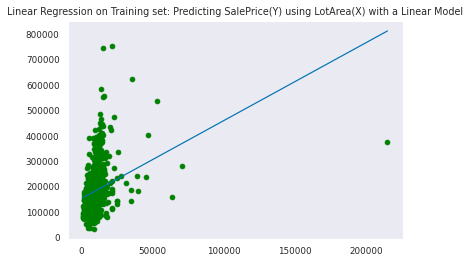

In [ ]:
plt.scatter(X_train, y_train,color='g')
plt.plot(X_train_copy_1, model_0.predict(X_train_copy_1))
plt.title('Linear Regression on Training set: Predicting SalePrice(Y) using LotArea(X) with a Linear Model')
plt.show()

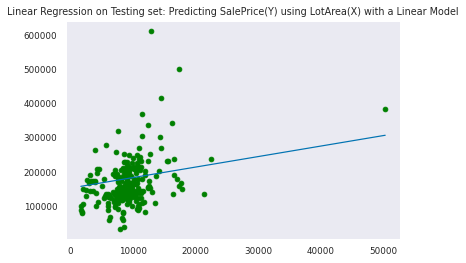

In [ ]:
plt.scatter(X_test, y_test,color='g')
plt.plot(X_test_copy_1, model_0.predict(X_test_copy_1))
plt.title('Linear Regression on Testing set: Predicting SalePrice(Y) using LotArea(X) with a Linear Model')
plt.show()

## Use the multiple regression method to estimate the  value of the weights/coefficients for predicting 'SalePrice' based on the following features:

- Model 1: LotFrontage, LotArea
- Model 2: LotFrontage, LotArea, OverallQual, OverallCond
- Model 3: LotFrontage, LotArea, OverallQual, OverallCond, 1stFlrSF, GrLivArea


### Model 1: LotFrontage, LotArea

In [ ]:
model_1 = LinearRegression()
cols = ['LotArea', 'LotFrontage']
X_train = train[cols]
X_test = test[cols]

model_1.fit(X_train, y_train)
print("Coefficients :", model_1.coef_)
print("Intercept: ", model_1.intercept_)
print("Training R2 Score", model_1.score(X_train, y_train))
print("Test R2 Score", model_1.score(X_test, y_test))
print("Training MSE Score:", np.mean((y_train - model_1.predict(X_train)) ** 2))
print("Test MSE Score:", np.mean((y_test - model_1.predict(X_test)) ** 2))
print("------------------------------------")
weights_of_LotArea[1] = model_1.coef_[0]

Coefficients : [  1.90578562 947.71569695]
Intercept:  98252.52075249185
Training R2 Score 0.15548272542793504
Test R2 Score 0.10330767116226003
Training MSE Score: 6330941876.521212
Test MSE Score: 4064804089.8873663
------------------------------------


### Model 2: LotFrontage, LotArea, OverallQual, OverallCond

In [ ]:
model_2 = LinearRegression()
cols = ['LotArea', 'LotFrontage', 'OverallQual', 'OverallCond']
X_train = train[cols]
X_test = test[cols]

model_2.fit(X_train, y_train)
print("Coefficients :", model_2.coef_)
print("Intercept: ", model_2.intercept_)
print("Training R2 Score", model_2.score(X_train, y_train))
print("Test R2 Score", model_2.score(X_test, y_test))
print("Training MSE Score:", np.mean((y_train - model_2.predict(X_train)) ** 2))
print("Test MSE Score:", np.mean((y_test - model_2.predict(X_test)) ** 2))
print("------------------------------------")
weights_of_LotArea[2] = model_2.coef_[0]

Coefficients : [ 1.24181274e+00  3.61230895e+02  4.50837864e+04 -6.39899391e+02]
Intercept:  -127974.7555503003
Training R2 Score 0.6855835863054668
Test R2 Score 0.6307821250059973
Training MSE Score: 2357029394.257201
Test MSE Score: 1673704881.8968096
------------------------------------


### Model 3: LotFrontage, LotArea, OverallQual, OverallCond, 1stFlrSF, GrLivArea

In [ ]:
model_3 = LinearRegression()
cols = ['LotArea', 'LotFrontage', 'OverallQual', 'OverallCond', '1stFlrSF', 'GrLivArea']
X_train = train[cols]
X_test = test[cols]

model_3.fit(X_train, y_train)
print("Coefficients :", model_3.coef_)
print("Intercept: ", model_3.intercept_)
print("Training R2 Score", model_3.score(X_train, y_train))
print("Test R2 Score", model_3.score(X_test, y_test))
print("Training MSE Score:", np.mean((y_train - model_3.predict(X_train)) ** 2))
print("Test MSE Score:", np.mean((y_test - model_3.predict(X_test)) ** 2))
print("------------------------------------")
weights_of_LotArea[3] = model_3.coef_[0]

Coefficients : [7.17308596e-01 1.23781110e+01 3.32884093e+04 7.11055322e+02
 3.35584568e+01 3.94411708e+01]
Intercept:  -132673.55210699735
Training R2 Score 0.7460817293514201
Test R2 Score 0.7127218913283009
Training MSE Score: 1903503766.3113735
Test MSE Score: 1302262987.5482461
------------------------------------


## Use the multiple regression method to estimate the  value of the weights/coefficients for predicting 'SalePrice' based on the following set of mixed  ( numerical and categorical) features:

- Model 4: LotArea, Street
- Model 5: LotArea, OverallCond,  Street, Neighborhood
- Model 6: LotArea, OverallCond, Street, 1stFlrSF, Neighborhood, Year


### Check the range of years in the training data.

In [ ]:
print("Most recent year : ")
print(train["YearBuilt"].max())
print("Least recent year : ")
print(train["YearBuilt"].min())

Most recent year : 
2010
Least recent year : 
1872


### Testing dataset doesn't have the ***ClearCr*** neighborhood or ***Gravel*** streets, so add a column of zeros for them manually

In [ ]:
print("Training set : ")
print(sorted(train["Neighborhood"].unique()))
print("Testing set : ")
print(sorted(test["Neighborhood"].unique()))

Training set : 
['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker']
Testing set : 
['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker']


In [ ]:
print("Training set : ")
print(train["Street"].unique())
print("Testing set : ")
print(test["Street"].unique())

Training set : 
['Pave' 'Grvl']
Testing set : 
['Pave']


In [ ]:
%%capture
test.loc[:, 'ClearCr'] = 0
test.loc[:, 'Grvl'] = 0

In [ ]:
print("Testing set shape: ")
train.shape

Testing set shape: 


(960, 10)

In [ ]:
print("Testing set shape: ")
test.shape

Testing set shape: 


(241, 12)

### Create dummy variables for each categorical feature 

In [ ]:
categorical_cols = ['Street', 'Neighborhood']
for col in categorical_cols:
  train = train.join(pd.get_dummies(train[col]))
  test = test.join(pd.get_dummies(test[col]))

In [ ]:
print("Testing set shape: ")
train.shape

Testing set shape: 


(960, 37)

In [ ]:
print("Testing set shape: ")
test.shape

Testing set shape: 


(241, 37)

### Model 4: LotArea, Street

In [ ]:
model_4 = LinearRegression()
cols = ['LotArea', 'Grvl', 'Pave']
X_train = train[cols]
X_test = test[cols]

model_4.fit(X_train, y_train)
print("Coefficients :", model_4.coef_)
print("Intercept: ", model_4.intercept_)
print("Training R2 Score", model_4.score(X_train, y_train))
print("Test R2 Score", model_4.score(X_test, y_test))
print("Training MSE Score:", np.mean((y_train - model_4.predict(X_train)) ** 2))
print("Test MSE Score:", np.mean((y_test - model_4.predict(X_test)) ** 2))
print("------------------------------------")
weights_of_LotArea[4] = model_4.coef_[0]

Coefficients : [ 3.10841101e+00 -4.69160661e+04  4.69160661e+04]
Intercept:  106278.49976814234
Training R2 Score 0.09876983231048453
Test R2 Score 0.06530285163673055
Training MSE Score: 6756091297.127055
Test MSE Score: 4237084080.3307295
------------------------------------


### Model 5: LotArea, OverallCond, Street, Neighborhood

In [ ]:
model_5 = LinearRegression()
cols = ['LotArea', 'Grvl', 'Pave', 'OverallCond', 'Blmngtn', 'Blueste', 'BrDale', 
        'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 
        'MeadowV', 'Mitchel', 'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 
        'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker']
X_train = train[cols]
X_test = test[cols]

model_5.fit(X_train, y_train)
print("Coefficients :", model_5.coef_)
print("Intercept: ", model_5.intercept_)
print("Training R2 Score", model_5.score(X_train, y_train))
print("Test R2 Score", model_5.score(X_test, y_test))
print("Training MSE Score:", np.mean((y_train - model_5.predict(X_train)) ** 2))
print("Test MSE Score:", np.mean((y_test - model_5.predict(X_test)) ** 2))
print("------------------------------------")
weights_of_LotArea[5] = model_5.coef_[0]

Coefficients : [ 2.03702836e+00 -1.63459937e+04  1.63459937e+04  7.45278117e+03
  2.13116799e+04 -4.83540948e+04 -6.39468239e+04 -5.98834775e+04
 -6.70195991e+03  1.50231836e+04  6.19760751e+03 -5.59521593e+04
  7.56727756e+03 -7.89436935e+04 -6.90762057e+04 -3.69137601e+04
 -4.22548398e+04 -2.58279399e+04 -2.73427218e+03  1.48192048e+05
  1.31809577e+05 -6.08112809e+04 -3.48747606e+04 -5.25354616e+04
  6.65346685e+03  5.68583079e+04  1.50813098e+05  4.47176790e+04
  4.96668034e+04]
Intercept:  108643.27719470818
Training R2 Score 0.6040465602247971
Test R2 Score 0.616775885881661
Training MSE Score: 2968273460.475608
Test MSE Score: 1737196690.899276
------------------------------------


### Model 6: LotArea, OverallCond, Street, 1stFlrSF, Neighborhood, Year

In [ ]:
model_6 = LinearRegression()
cols = ['LotArea', 'Grvl', 'Pave', 'YearBuilt', 'OverallCond', '1stFlrSF',
        'Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 
        'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 
        'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 
        'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker']
X_train = train[cols]
X_test = test[cols]

model_6.fit(X_train, y_train)
print("Coefficients :", model_6.coef_)
print("Intercept: ", model_6.intercept_)
print("Training R2 Score", model_6.score(X_train, y_train))
print("Test R2 Score", model_6.score(X_test, y_test))
print("Training MSE Score:", np.mean((y_train - model_6.predict(X_train)) ** 2))
print("Test MSE Score:", np.mean((y_test - model_6.predict(X_test)) ** 2))
print("------------------------------------")
weights_of_LotArea[6] = model_6.coef_[0]

Coefficients : [ 1.17573136e+00 -1.76788941e+04  1.76788941e+04  6.12520486e+02
  1.10509350e+04  7.80255370e+01 -2.29032536e+04 -1.62884836e+04
 -2.70240525e+04 -2.21325300e+04 -5.01082596e+02 -1.86051072e+03
  2.01715552e+04 -4.41029802e+04  6.65234229e+03 -2.77880153e+04
 -4.48760776e+04 -4.52879121e+04 -3.56778091e+04 -1.37721523e+04
 -1.92188824e+04  1.12158996e+05  8.16911759e+04 -2.03724941e+04
 -5.03280613e+03 -4.63537441e+04 -6.69531638e+03  3.22316570e+04
  1.04135144e+05  2.04784180e+04  2.23688141e+04]
Intercept:  -1201787.3598678526
Training R2 Score 0.7100668171505187
Test R2 Score 0.725195006021002
Training MSE Score: 2173490328.6909986
Test MSE Score: 1245720998.7456412
------------------------------------


## List of all the models and features each one uses.

                 

| Model         | Features used|
| :-------------|:----------------|
| Model 0       |    LotArea             |
| Model 1       |      LotFrontage, LotArea           |
| Model 2       |       LotFrontage, LotArea, OverallQual, OverallCond          | 
| Model 3       |     LotFrontage, LotArea, OverallQual, OverallCond, 1stFlrSF, GrLivArea            |              
| Model 4       |         LotArea, Street        |              
| Model 5       |       LotArea, OverallCond, Street, Neighborhood          |              
| Model 6       |       LotArea, OverallCond, Street, 1stFlrSF, Neighborhood, Year          |  

## Calculate and compare the Mean squared Error, R2 score for each of the model for test and training set for the above models.


| Model         | MSE  (training) | MSE(testing) | | R2  (training)  | R2(testing)  |
| :-------------|:----------------|:-------------||:----------------|:-------------|
| Model 0       |      6801580464.01976       |       4228531500.5697026       ||       0.09270179567453762          |      0.06718954346588057        |
| Model 1       |       6330941876.521212          |         4064804089.8873663     ||        0.15548272542793504         |       0.10330767116226003       |
| Model 2       |          2357029394.257201       |       1673704881.8968096       ||      0.6855835863054668           |         0.6307821250059973     |
| Model 3       |         1903503766.3113735        |        1302262987.5482461      ||    0.7460817293514201             |        0.7127218913283009      |
| Model 4       |          6756091297.127055       |         4237084080.3307295     ||       0.09876983231048453          |      0.06530285163673055        |
| Model 5       |       2968273460.475608          |     1737196690.899276         ||       0.6040465602247971          |      0.616775885881661        |
| Model 6       |        2173490328.6909986         |       1245720998.7456412       ||       0.7100668171505187          |        0.725195006021002      |

```
R2_training : Model_3 > Model_6 > Model_2 > Model_5 > Model_1 > Model_4 > Model_0
R2_testing : Model_6 > Model_3 > Model_2 > Model_5 > Model_1 > Model_0 > Model_4
``` 

Usually, the larger the R2, the better the regression model fits your observations. 

Thus Model_3 and Model_6 with R2 scores of nearly 75% appear to be the best out of these 7 models.

## Compare the feature “LotArea” weights/coefficients for all the seven trained models.


| Model         | Coefficients of LotArea     |
| :-------------|:----------------|
| Model 0       |      3.06669265           |
| Model 1       |       1.9057856          |
| Model 2       |      1.24181274e+00           | 
| Model 3       |        7.17308596e-01         |              
| Model 4       |      3.10841101e+00           |              
| Model 5       |     2.03702836e+00            |              
| Model 6       |     1.17573136e+00            |              |            

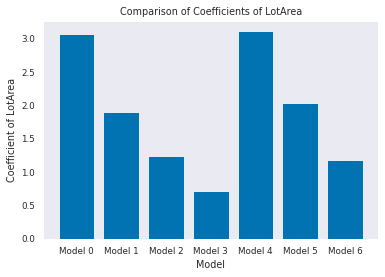

In [ ]:
plt.xlabel('Model')
plt.ylabel('Coefficient of LotArea')
plt.title('Comparison of Coefficients of LotArea') 
left = [index+1 for index in range(7)] 
height = weights_of_LotArea.values()
tick_label = ['Model ' + str(index) for index in range(7)] 
plt.bar(left, height, tick_label=tick_label, width = 0.8) 
plt.show() 

We can clearly see that the models which had the best R2 scores (Model_3 and Model_6) assign very small coefficients to LotArea, indicating that it is not really the most important feature for SalePrice prediction due to being highley correlated with other features in the feature set .

## Use the polynomial regression of degree (2 and 3),  to estimate the value of the weights/coefficients for predicting 'SalePrice' based on 'LotArea'.  

- Also, print the graph on the training and test set.


In [ ]:
X_train = train["LotArea"].values[:,np.newaxis]
X_test = test["LotArea"].values[:,np.newaxis]
y_train = train["SalePrice"].values
y_test = test["SalePrice"].values

X_train_copy = np.copy(X_train)
X_test_copy = np.copy(X_test)
y_train_copy = np.copy(y_train)
y_test_copy = np.copy(y_test)

X_train_copy.sort(axis=0)
y_train_copy.sort(axis=0)
X_test_copy.sort(axis=0)
y_test_copy.sort(axis=0)

### Polynomial Regression of degree 2

In [ ]:
degree = 2
polyreg = make_pipeline(PolynomialFeatures(degree),LinearRegression())
X_train = train["LotArea"].values[:,np.newaxis]
X_test = test["LotArea"].values[:,np.newaxis]
polyreg.fit(X_train,y_train)

print("Training R2 Score", polyreg.score(X_train, y_train))
print("Test R2 Score", polyreg.score(X_test, y_test))
print("Training MSE Score:", np.mean((y_train - polyreg.predict(X_train)) ** 2))
print("Test MSE Score:", np.mean((y_test - polyreg.predict(X_test)) ** 2))

Training R2 Score 0.1779902407230977
Test R2 Score 0.11670371531453783
Training MSE Score: 6162213804.983787
Test MSE Score: 4004078361.22069


#### Training curve

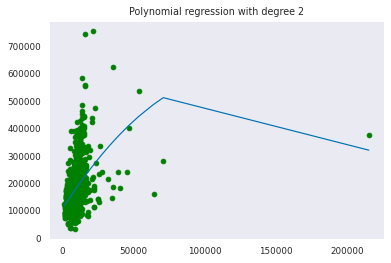

In [ ]:
plt.figure()
plt.scatter(X_train, y_train, color='g')
plt.plot(X_train_copy, polyreg.predict(X_train_copy))
plt.title("Polynomial regression with degree "+str(degree))
plt.show()

#### Testing curve

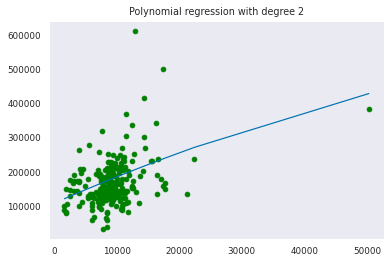

In [ ]:
plt.figure()
plt.scatter(X_test, y_test,color='g')
plt.plot(X_test_copy,polyreg.predict(X_test_copy))
plt.title("Polynomial regression with degree "+str(degree))
plt.show()

### Polynomial Regression of degree 3




In [ ]:
degree = 3
polyreg = make_pipeline(PolynomialFeatures(degree),LinearRegression())
X_train = train["LotArea"].values[:,np.newaxis]
X_test = test["LotArea"].values[:,np.newaxis]
polyreg.fit(X_train,y_train)

print("Training R2 Score", polyreg.score(X_train, y_train))
print("Test R2 Score", polyreg.score(X_test, y_test))
print("Training MSE Score:", np.mean((y_train - polyreg.predict(X_train)) ** 2))
print("Test MSE Score:", np.mean((y_test - polyreg.predict(X_test)) ** 2))

Training R2 Score 0.2156904294515526
Test R2 Score 0.07836163416724373
Training MSE Score: 5879593530.94064
Test MSE Score: 4177887195.365982


#### Training curve

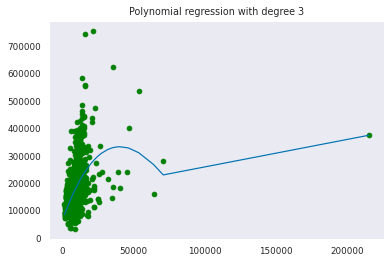

In [ ]:
plt.figure()
plt.scatter(X_train, y_train, color='g')
plt.plot(X_train_copy, polyreg.predict(X_train_copy))
plt.title("Polynomial regression with degree "+str(degree))
plt.show()

#### Testing curve

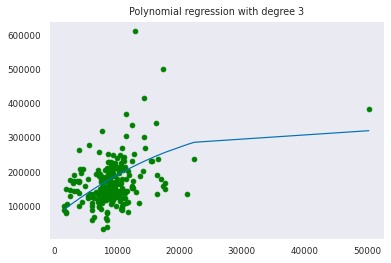

In [ ]:
plt.figure()
plt.scatter(X_test, y_test,color='g')
plt.plot(X_test_copy,polyreg.predict(X_test_copy))
plt.title("Polynomial regression with degree "+str(degree))
plt.show()